In [3]:
import pandas as pd
data = pd.read_excel(r'/Users/ezekielpulido/Downloads/commerce_data.xlsx')
data

,product_price,discount,viewer,likes,sales
0,11700,0.29,650000,180000,11700
1,17400,0.44,650000,180000,87000
2,14000,0.47,650000,180000,8540000
3,29100,0.29,410000,18000,5063400
4,32000,NaN,350000,15000,1024000
...,...,...,...,...,...
2898,1590,0.27,1271,4509,19080
2899,1390,0.26,1271,4509,31970
2900,1390,0.26,1271,4509,111200
2901,990,0.34,1271,4509,124740


In [4]:
data

,product_price,discount,viewer,likes,sales
0,11700,0.29,650000,180000,11700
1,17400,0.44,650000,180000,87000
2,14000,0.47,650000,180000,8540000
3,29100,0.29,410000,18000,5063400
4,32000,NaN,350000,15000,1024000
...,...,...,...,...,...
2898,1590,0.27,1271,4509,19080
2899,1390,0.26,1271,4509,31970
2900,1390,0.26,1271,4509,111200
2901,990,0.34,1271,4509,124740


In [22]:
data = data.fillna(0)
k_data = data[['discount','sales']].values
k_data

array([[2.9000e-01, 1.1700e+04],
       [4.4000e-01, 8.7000e+04],
       [4.7000e-01, 8.5400e+06],
       ...,
       [2.6000e-01, 1.1120e+05],
       [3.4000e-01, 1.2474e+05],
       [0.0000e+00, 1.9500e+05]])

In [25]:
from sklearn.cluster import KMeans
optimal_k = []

for i in range(2,51):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=10, n_init=10, random_state=0)
    kmeans.fit(k_data)
    res = kmeans.inertia_
    optimal_k.append(res)

Matplotlib is building the font cache; this may take a moment.


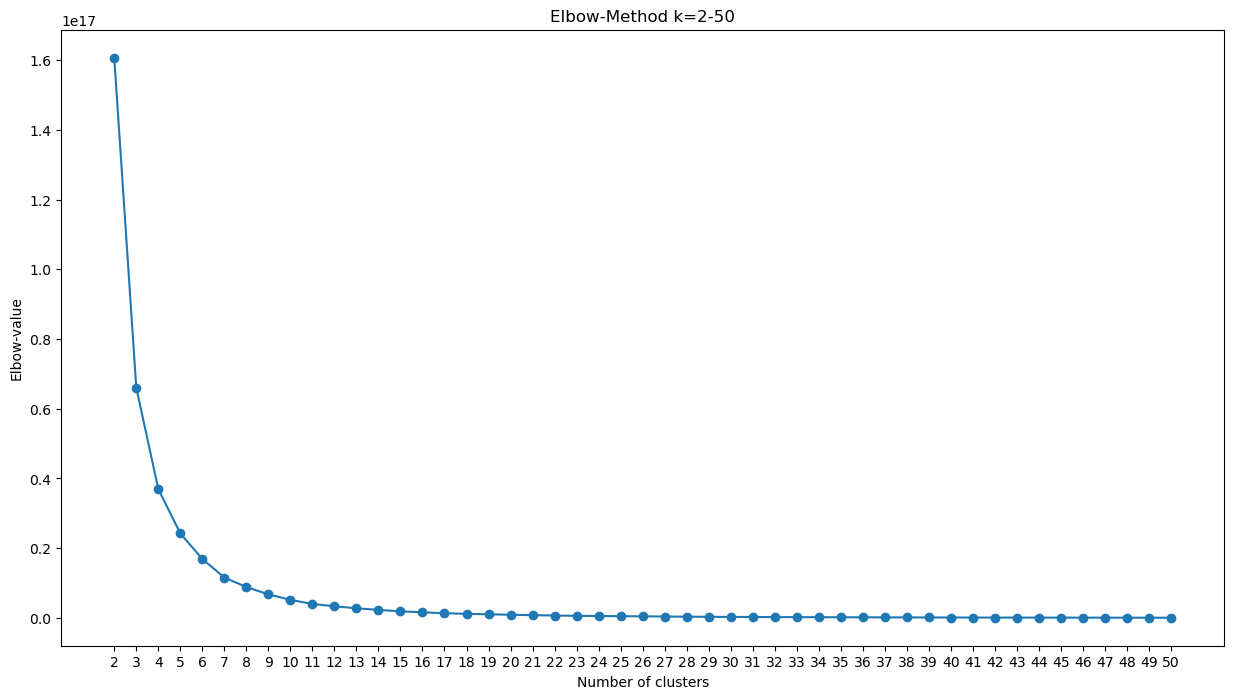

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(range(2,51), optimal_k, marker = 'o')
plt.title('Elbow-Method k=2-50')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow-value')
plt.xticks(range(2,51))
plt.show()

In [41]:
optimal_kmenas = KMeans(n_clusters=3, init='k-means++', max_iter= 10, n_init=10, random_state=0)
optimal_kmenas.fit(k_data)

y_pred = optimal_kmenas.predict(k_data)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

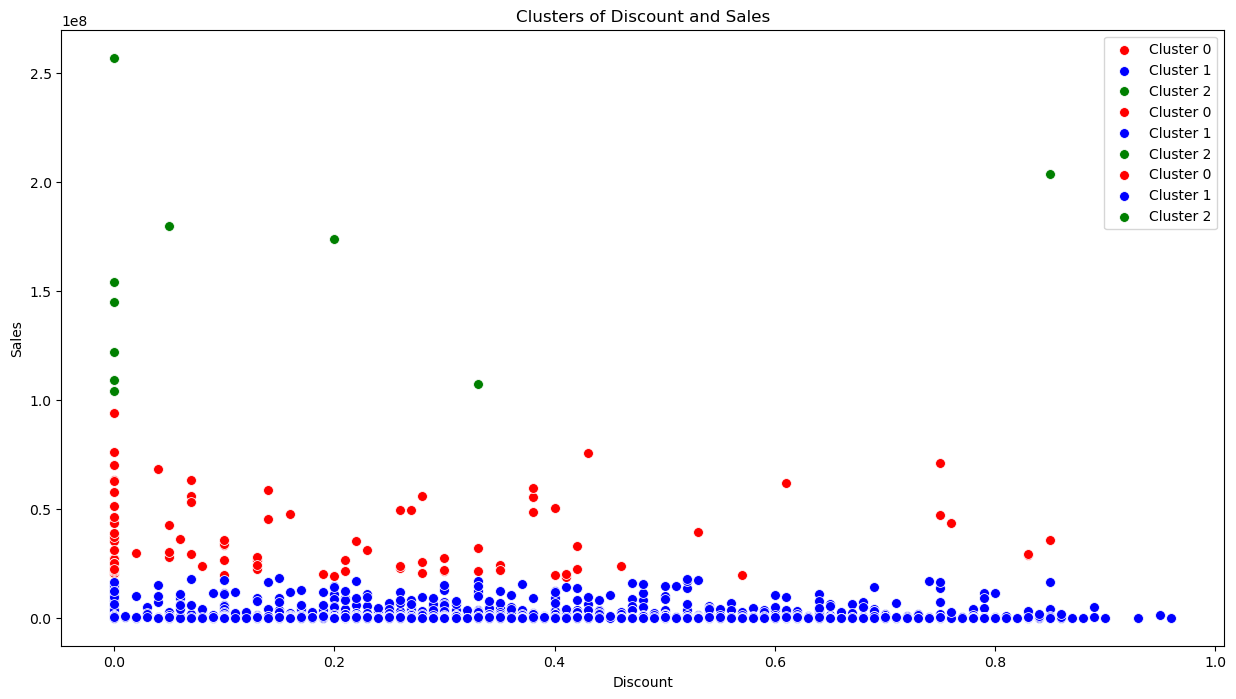

In [33]:
import seaborn as sb

color = ['red','blue','green']

plt.figure(figsize=(15,8))

for i in range(3):
   for i in range(3):  
    sb.scatterplot(x = k_data[y_pred == i, 0], y =k_data[y_pred == i, 1], 
                   color=color[i], label='Cluster ' + str(i), s=50)

plt.title('Clusters of Discount and Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [40]:
data['cluster'] = y_pred
data[data['cluster'] == 2]

,product_price,discount,viewer,likes,sales,cluster
55,59000,0.85,180000,41000,203844992,2
103,429000,0.00,120000,60000,104247000,2
104,474000,0.00,120000,60000,121818000,2
105,246000,0.00,120000,60000,257070000,2
141,159200,0.20,84000,53000,173846400,2
166,149000,0.33,73000,73000,107131000,2
216,57000,0.05,63000,27000,179835008,2
231,523000,0.00,58000,14000,154284992,2
310,454900,0.00,45000,17000,109176000,2
311,274900,0.00,45000,17000,145147200,2
